In [3]:
import os

In [ ]:
# from google.colab import files

# # Upload the zip file
# uploaded = files.upload()

# # Specify the zip file name
# zip_file_name = next(iter(uploaded))

# # Check if the file is present
# !ls

# # Unzip the file
# !unzip $zip_file_name -d /content/drive/MyDrive/yolo_project/yolov5/dataset_yolo/train

# # List the contents of the extracted directory
# # !ls /content/extracted


In [4]:
os.chdir('/content/drive/MyDrive/yolo_project')

In [ ]:
ls

data.yaml  test_images/  yolo.ipynb  yolov5/


In [ ]:
# !git clone https://github.com/ultralytics/yolov5.git  # cloaning yolov5 model from github

In [5]:
os.chdir('yolov5')  #changing directory i.e folder from yolo_project to yolov5

In [ ]:
ls

benchmarks.py    data/       export.py   __pycache__/      runs/      tutorial.ipynb
CITATION.cff     data.yaml   hubconf.py  README.md         segment/   utils/
classify/        data_yolo/  LICENSE     README.zh-CN.md   setup.cfg  val.py
CONTRIBUTING.md  detect.py   models/     requirements.txt  train.py   yolov5s.pt


In [6]:
import yaml
with open('data.yaml','r') as f:
        output = yaml.safe_load(f)
        print(output["nc"])

20


In [ ]:
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
from IPython.core.magic import register_line_cell_magic


@register_line_cell_magic

def writetemplate(line, cell):
    with open(line,'w') as f:
        f.write(cell.format(**globals ()))

In [ ]:
%%writetemplate /content/drive/MyDrive/yolo project/yolov5/models/custom_yolov5s.yaml

nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
    [
   [-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],
   [-1, 3, C3, [512, False]],
   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],
   [-1, 3, C3, [256, False]],

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],
   [-1, 3, C3, [512, False]],

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],
   [-1, 3, C3, [1024, False]],

   [[17, 20, 23], 1, Detect, [nc, anchors]], ]


In [ ]:
%cat /content/drive/MyDrive/yolo_project/yolov5/models/custom_yolov5s.yaml


nc: 20  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
    [
   [-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],
   [-1, 3, C3, [512, False]],
   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],
   [-1, 3, C3, [256, False]],

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14]

In [ ]:
!python train.py --batch-size 10 --epochs 50 --data '/content/drive/MyDrive/yolo_project/data.yaml' --cfg /content/drive/MyDrive/yolo_project/yolov5/models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolov5_result --cache


2023-11-26 15:07:45.132762: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 15:07:45.132820: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 15:07:45.137266: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=/content/drive/MyDrive/yolo_project/yolov5/models/custom_yolov5s.yaml, data=/content/drive/MyDrive/yolo_project/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=

In [ ]:
! python export.py --weights runs/train/yolov5_result2/weights/best.pt --include torchscript onnx

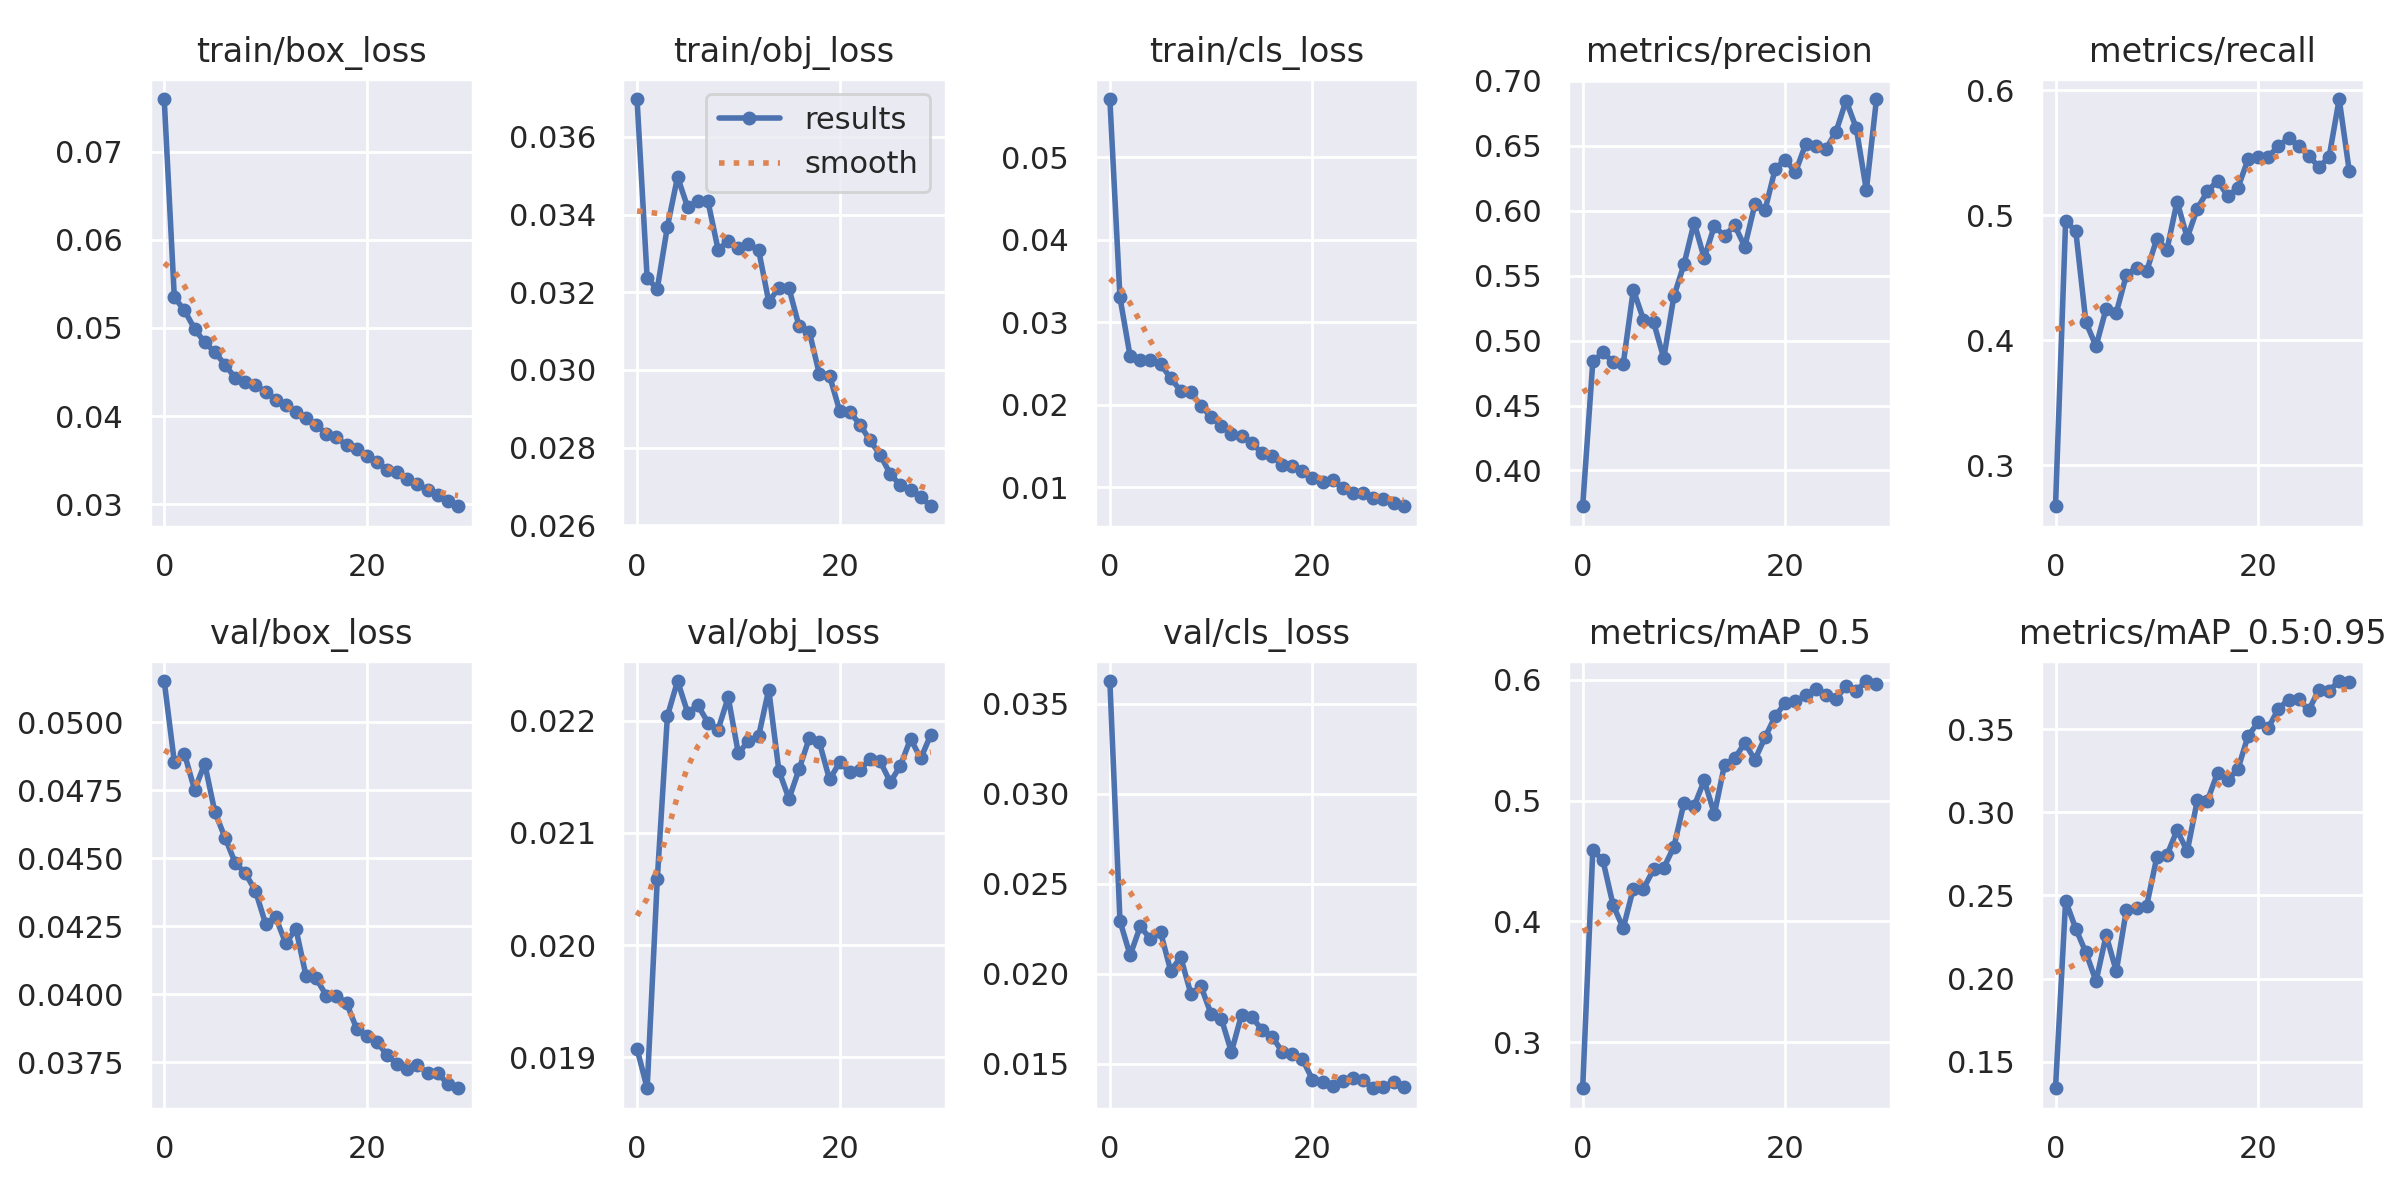

In [ ]:
from PIL import Image

Image.open('/content/drive/MyDrive/yolo_project/yolov5/runs/train/yolov5_result2/results.png')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/yolo_project/yolov5/runs/train/yolov5_result2/results.csv')
df

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.075963,0.036973,0.057044,0.37246,0.26705,0.26198,0.13401,0.051512,0.019075,0.036250,0.070075,0.003325,0.003325
1,1,0.053457,0.032355,0.032990,0.48388,0.49533,0.45910,0.24682,0.048534,0.018724,0.022933,0.039855,0.006439,0.006439
2,2,0.051989,0.032092,0.025868,0.49081,0.48738,0.45044,0.22999,0.048836,0.020589,0.021027,0.009416,0.009332,0.009332
3,3,0.049890,0.033690,0.025375,0.48360,0.41438,0.41356,0.21572,0.047510,0.022043,0.022628,0.009010,0.009010,0.009010
4,4,0.048348,0.034968,0.025394,0.48174,0.39516,0.39438,0.19843,0.048476,0.022355,0.021939,0.009010,0.009010,0.009010
5,5,0.047260,0.034186,0.024948,0.53908,0.42529,0.42723,0.22605,0.046694,0.022073,0.022320,0.008680,0.008680,0.008680
6,6,0.045821,0.034343,0.023212,0.51613,0.42206,0.42712,0.20439,0.045760,0.022139,0.020178,0.008350,0.008350,0.008350
7,7,0.044343,0.034340,0.021664,0.51417,0.45225,0.44296,0.24140,0.044835,0.021985,0.020911,0.008020,0.008020,0.008020
8,8,0.043863,0.033098,0.021518,0.48633,0.45782,0.44431,0.24268,0.044447,0.021922,0.018887,0.007690,0.007690,0.007690
9,9,0.043468,0.033315,0.019844,0.53400,0.45529,0.46163,0.24385,0.043804,0.022210,0.019308,0.007360,0.007360,0.007360


In [ ]:
Image.open('/content/drive/MyDrive/yolo_project/yolov5/runs/train/yolov5_result2/val_batch0_labels.jpg')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Image.open('/content/drive/MyDrive/yolo_project/yolov5/runs/train/yolov5_result2/train_batch0.jpg')

Output hidden; open in https://colab.research.google.com to view.